# <font color="red">What's Making Red Wine "Good"?</font>

This notebook aims to classify the quality of red wine using various parameters or features. This will be a approached as classification problem and will try to use various classification models to find the best accuracy score.

In [1]:
#Python and Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import graphviz  

#Wrangling/ Exploration
import explore
import wrangle 
from wrangle import get_wine_data, split_wine_data 

#Math
from scipy import stats

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#Warnings
import warnings
warnings.filterwarnings("ignore")



# <font color="red">What's Making Red Wine "Good"?</font>

## <font color ="darkgreen">Executive Summary</font>
* __The Problem__
    - What is driving the quality in red wine?

* __The Goal__
    - Identify the drivers for quality rankings in red wine.
    - Document my process/ workflow used to accomplish the project goals.
    - Demonstrate my process and summarize my findings.

* __The Process/ Pipeline__
    1. Acquire the Data
    2. Prepare
    3. Explore
    4. Model
    5. Create Recommendations Based On Findings


## <font color ="blue">The Findings</font>
* Alcohol was the most significant feature in regards to higher quality red wine rankings.
*  The higher the percentage of sulphates, the higher the quality of wine. 
* The higher the levels of volitile acidity, sulfur dioxide, and chlorides, the lower the quality of the wine.
* Random Forest was my best performing classification model overall.



## <font color="purple">Project Planning</font>
* The trello board I used to map out my project planning can be found <a href="https://trello.com/b/NJcVVZvd/individual-project-board">[here]</a>.

   * `Data Acquisition`: Data is collected from the UCI database with the appropriate function to grab the red wine data from file path and read as a dataframe  
   * `Data Prep`: Column data types are appropriate for the data they contain
   * `Data Prep`: Missing values are investigated and handled
   * `Exploration`: The interaction between independent variables and the target variable is explored using visualization and statistical testing
   * `Modeling`: Different classification models are created and their performance is compared. 
   
## <font color="red">Hypotheses:</font>
  * Is there a correlation between alcohol and red wine qquality ranking?
  * Is there a correlation between sulfates and red wine quality ranking?
  * Is there a corrlation between citric acid and red wine quality ranking?

#### <a href="https://github.com/brandonjbryant/individual_project/blob/main/README.md">[Data Dictionary can be found here]</a>



## <font color="green">Acquisition</font>
Data was obtained from the UCI database which can be found  <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality">here</a>, and then acquired using this fucntion housed in my `wrangle.py` file:

>def get_wine_data():
 
   >   df = pd.read_csv('winequality-red.csv')
   
   >  return df


## <font color="blue">Preparation</font>
* This data set contained very few nulls or missing vallues, the few that remained were identified and handled using functions housed in my `wrangle.py` file.

In [2]:
#Acquire the data
df = wrangle.get_wine_data()


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print(f'My original dataframe is coming in with {df.shape[0]} rows and {df.shape[1]} columns.')

My original dataframe is coming in with 1599 rows and 12 columns.


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Dataframe now has zero nulls to address

# <font color="darkgreen">Explore</font>

In [8]:
#7 quality scores
#Insert percentages here 
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

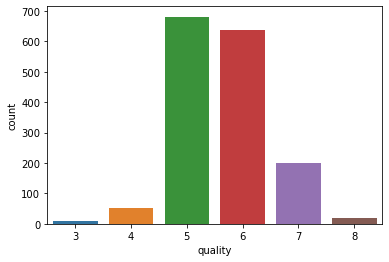

In [9]:
sns.countplot(x='quality',data=df)

<Figure size 432x288 with 0 Axes>

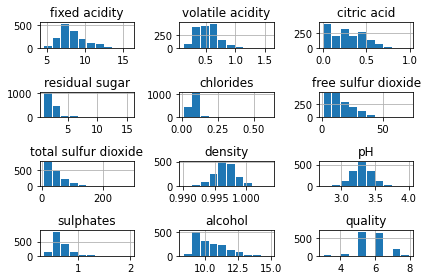

In [10]:
#Histogram on each feature
plt.figure()
df.hist(rwidth=0.9)
plt.tight_layout()

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## <font color ="dark green">Univariate Takeaways</font>
- 5 & 6 are most populated quality rankings
- Mean quality is 5.6 
- Mean alcohol percentage is 10.4
- Will be best to try and compare each feature with the quality feature

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

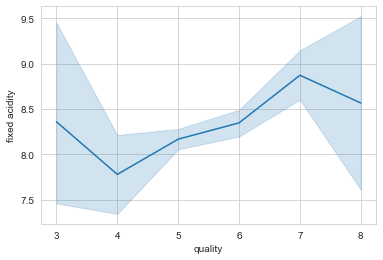

In [12]:
#Quality to Fixed acidity 
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="fixed acidity")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

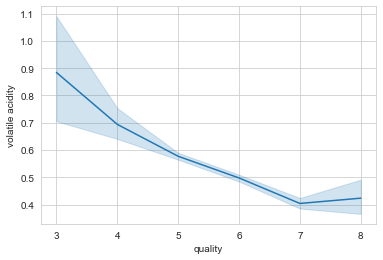

In [13]:
#Quality to volitile acidity
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

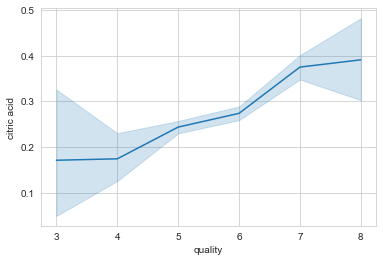

In [14]:
#Quality to citric acid
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

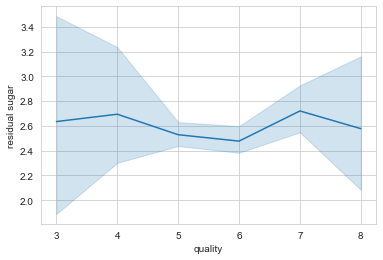

In [15]:
#Quality to residual sugar
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

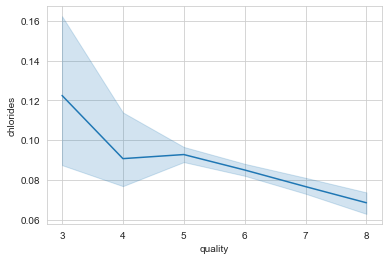

In [16]:
#Quality to chlorides
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

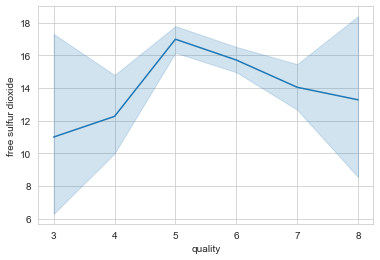

In [17]:
#Quality to free sulfur dioxide
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

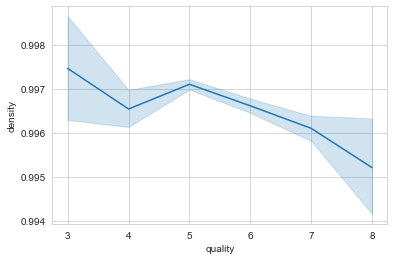

In [18]:
#Qquality to density 
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'density', data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

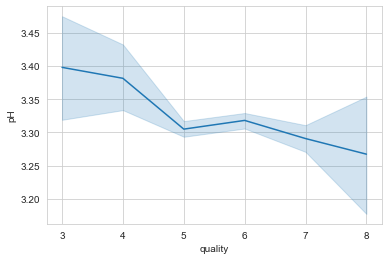

In [19]:
#Quality to pH
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'pH', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

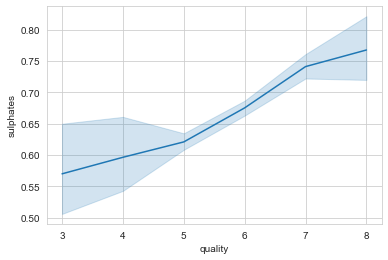

In [20]:
#Quality to sulphates
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

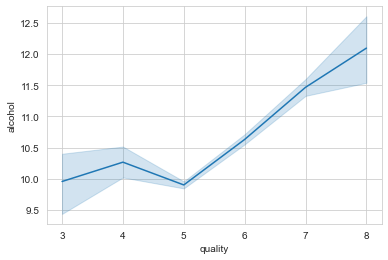

In [21]:
#Quality to alcohol
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'alcohol', data = df)

## Takeaways so far:

- Along with the increase of the quality score, the level of chlorides and volatile acidity decreases.

- Along with the increase of quality score, the levels of alcohol, sulphates and citric acid increases.

In [22]:
from wrangle import split_wine_data

In [23]:
train, validate, test = split_wine_data(df, stratify_by='quality')
train.shape, validate.shape, test.shape

((895, 12), (384, 12), (320, 12))

In [24]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
564,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6
964,8.5,0.470,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,11.1,6
768,7.1,0.590,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,6
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
191,6.4,0.370,0.25,1.9,0.074,21.0,49.0,0.99740,3.57,0.62,9.8,6


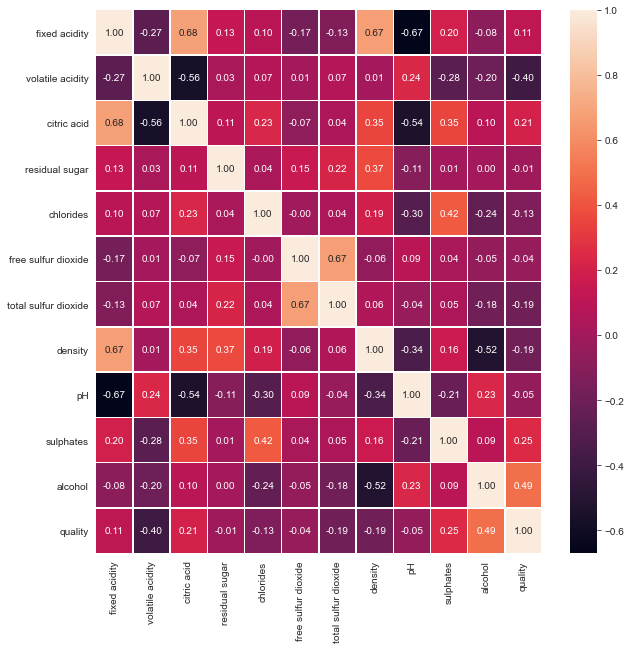

In [25]:
#Correlation heatmap view
train.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(train.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

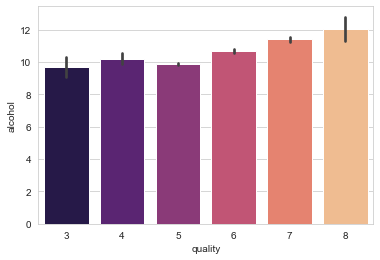

In [26]:
#Barplot visualizing relationship between alcohol and quality
sns.barplot(x = train['quality'], y = train['alcohol'],palette='magma')

In [27]:
pd.DataFrame(train.groupby('quality')['alcohol'].value_counts())

alcohol
quality alcohol         
3       8.4            1
        9.0            1
        9.7            1
        9.9            1
        10.2           1
...                  ...
8       11.4           1
        11.7           1
        12.5           1
        12.7           1
        13.1           1

[152 rows x 1 columns]

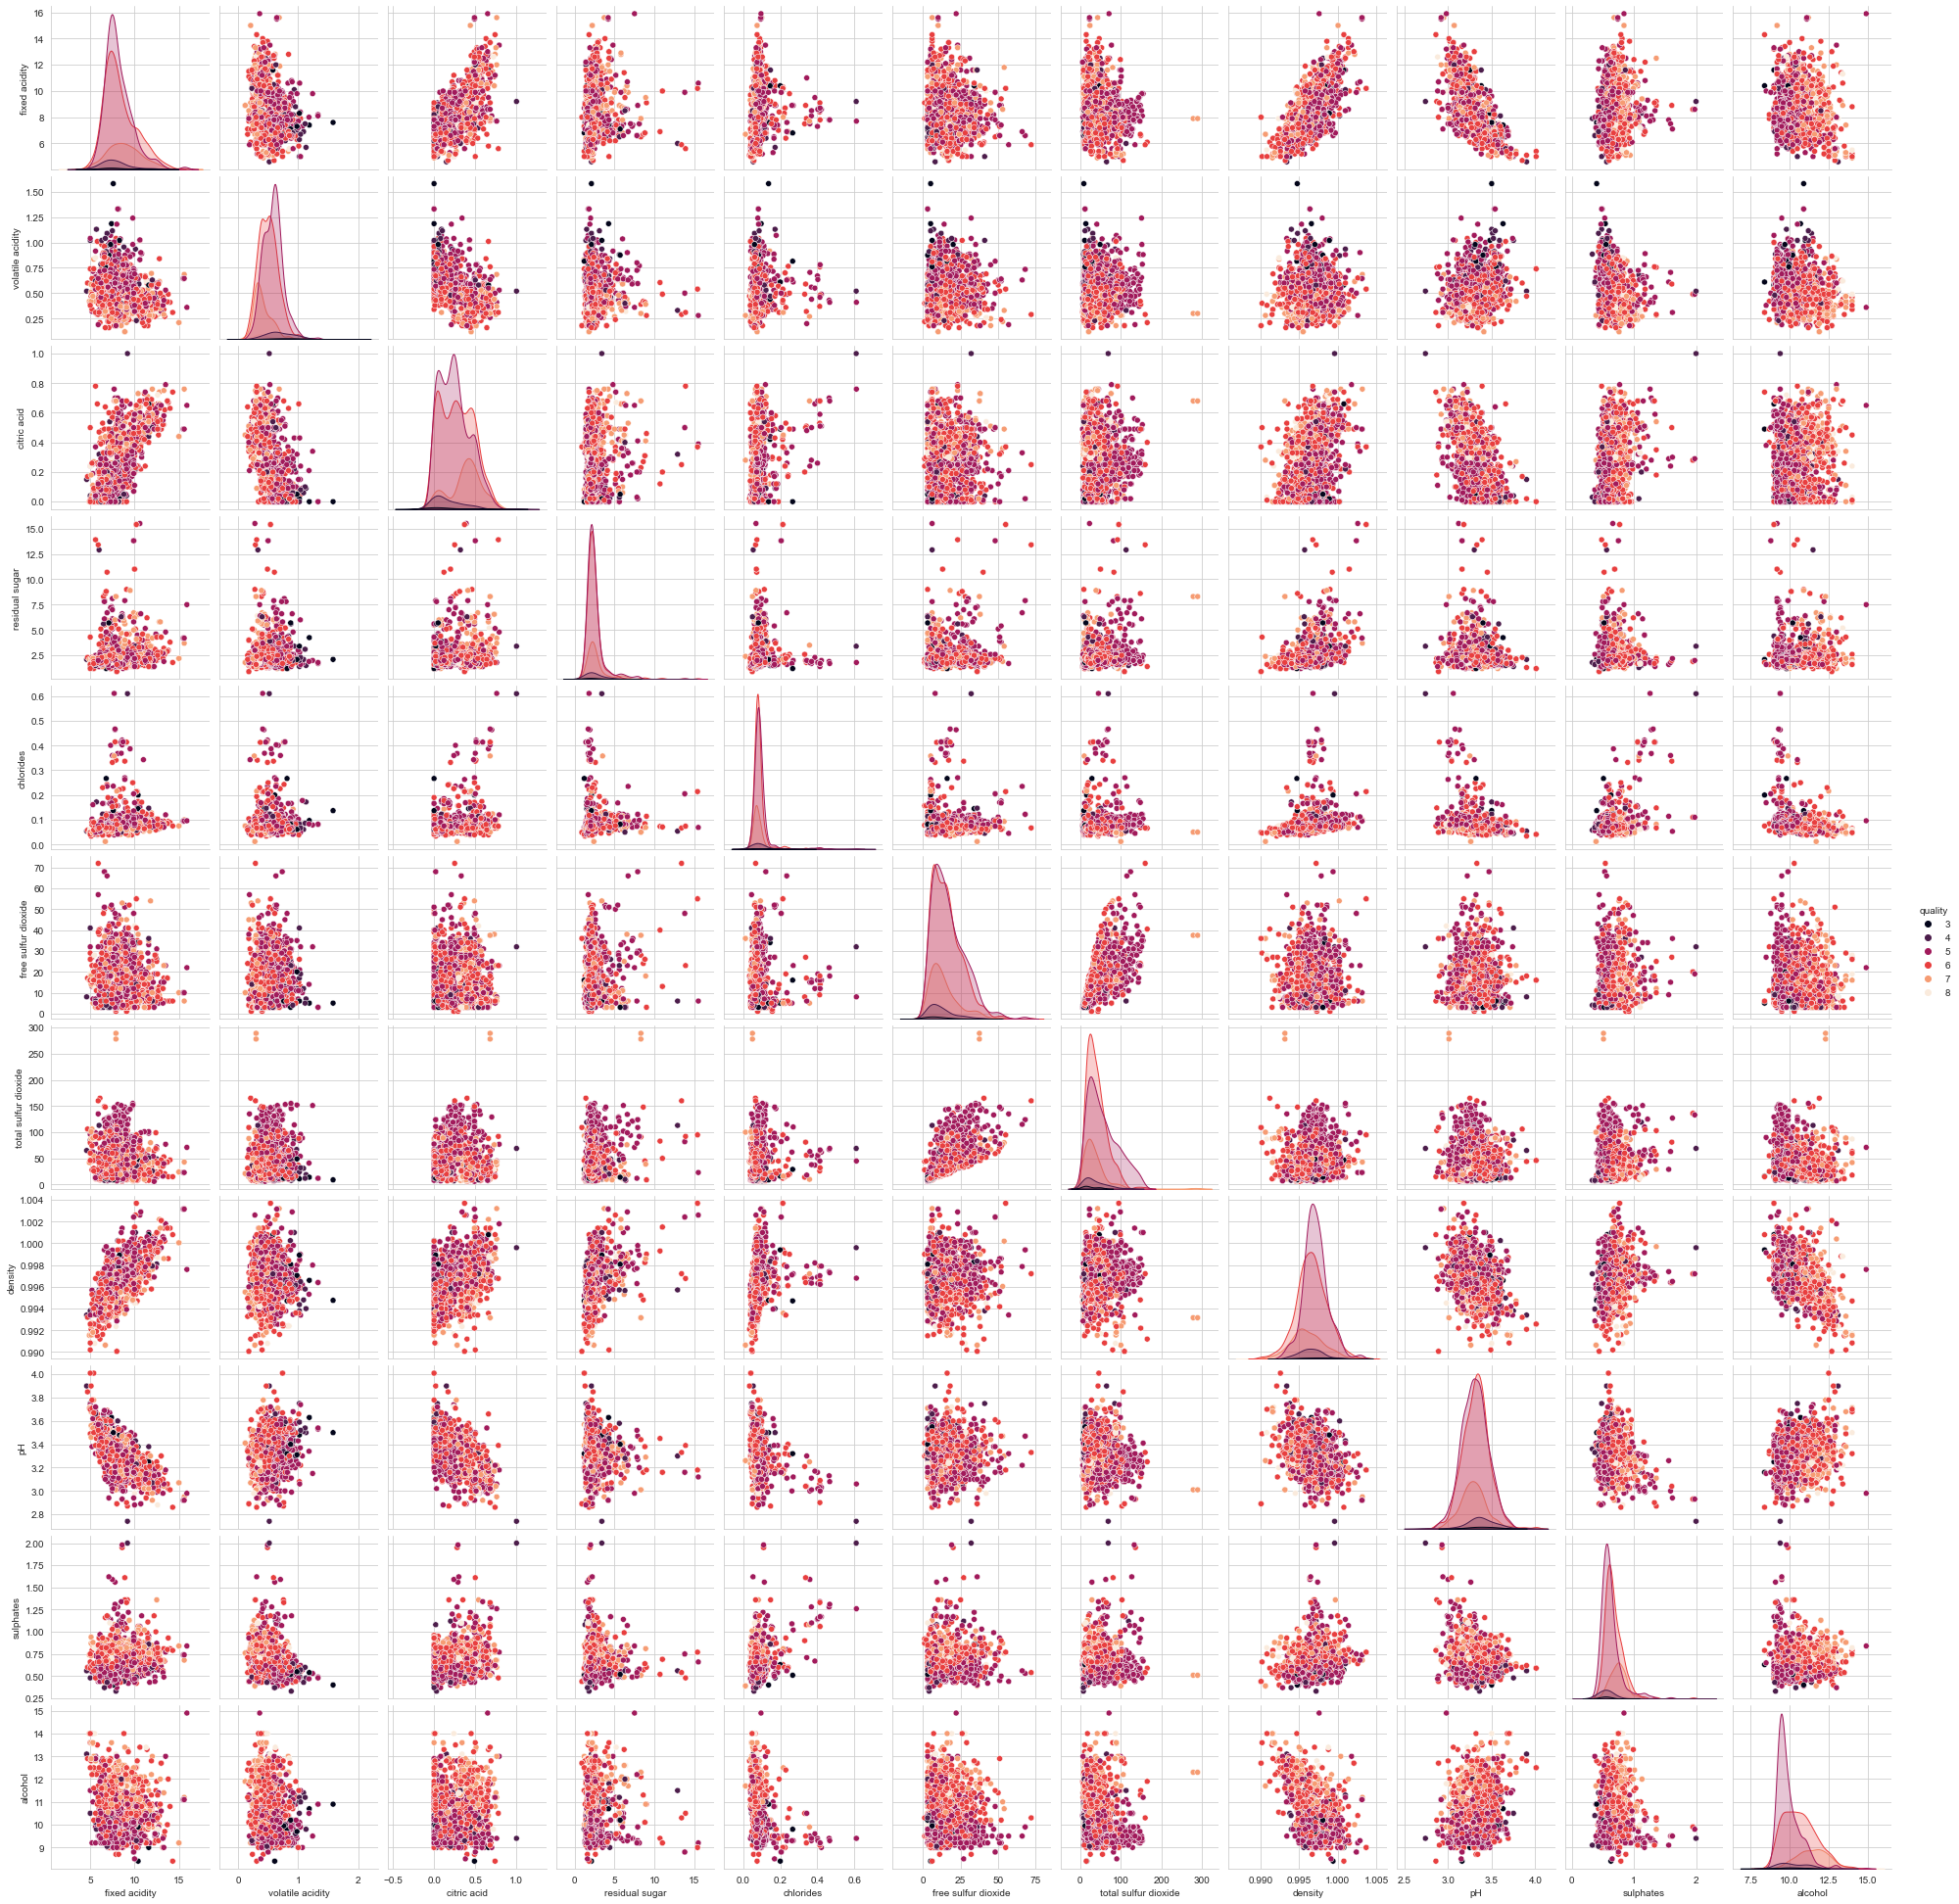

In [28]:
sns.pairplot(df, hue="quality", palette="rocket")

## <font color="dark green">Bivariate Takeaways</font>

- Quality has a positive correation between alcohol
- Quality has a weak negative correlation to volitile_acidicity
- Quality has almost no relationship with residual_sugar, free sulfur dioxide, and pH.Should drop these columns.
- Alcohol has a weak correlation to pH
- Volitile acidicity has a strong negative correlation to citric acid
- Density has positive correlation fixed acidicity
- Citric acid has positive correlation between fixed acidicity
- Citric acid has a negative relationship between volitile acidicity and pH



In [29]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 564 to 846
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         895 non-null    float64
 1   volatile acidity      895 non-null    float64
 2   citric acid           895 non-null    float64
 3   residual sugar        895 non-null    float64
 4   chlorides             895 non-null    float64
 5   free sulfur dioxide   895 non-null    float64
 6   total sulfur dioxide  895 non-null    float64
 7   density               895 non-null    float64
 8   pH                    895 non-null    float64
 9   sulphates             895 non-null    float64
 10  alcohol               895 non-null    float64
 11  quality               895 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 130.9 KB


In [30]:
#Bivariate Takeaways 
cat_vars =["type","quality"]
quant_vars =["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

In [31]:
corr = train.corr()


In [32]:
corr = pd.DataFrame(corr)
corr_wine_quality = pd.DataFrame(corr.quality)
corr_wine_quality


,quality
fixed acidity,0.114211
volatile acidity,-0.395508
citric acid,0.207859
residual sugar,-0.012104
chlorides,-0.131886
free sulfur dioxide,-0.039576
total sulfur dioxide,-0.188605
density,-0.190084
pH,-0.046544
sulphates,0.248867


<AxesSubplot:xlabel='quality', ylabel='count'>

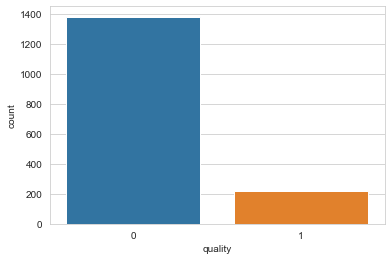

In [33]:
#Here i set a quality threshold to visualize the distribution of "good" quality wines and "bad" quality wines
#If the wine was ranked above a six i placed it in the good category
df['quality'] = [1 if i > 6 else 0 for i in df['quality']]
sns.countplot(x=df['quality'])

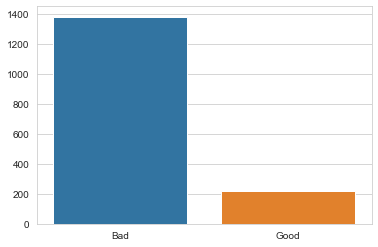

In [34]:
x = df.quality.value_counts()
sns.barplot(['Bad','Good'],x.values)
plt.show()

In [35]:
#drop columns I don't need
df=df.drop(['residual sugar','free sulfur dioxide','pH'],axis=1)

# <font color ="brown">Modeling</font>

In [36]:
#Find median or mode
train.quality.value_counts()

5    381
6    357
7    111
4     29
8     11
3      6
Name: quality, dtype: int64

In [37]:
# Establish new column that contains the mode
train["most_frequent"] = 5

# Calcuate the baseline accuracy
baseline_accuracy = (train.quality == train.most_frequent).mean()
print(f'My baseline prediction is survived = 0')
print(f'My baseline accuracy is: {baseline_accuracy:.2%}')

My baseline prediction is survived = 0
My baseline accuracy is: 42.57%


#### <font color="slategray">I learned a variety of new methods in regards to modeling that I implemented in this project I will explain in the comments what each new function is designated for.</font>

In [38]:
#This function gives for each value the same value intervals means between 0-1
def normalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X_t = (X - mean)/std
    return X_t

#Train and Test splitting of data     
def train_test(X_t, y):
    x_train, x_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.3, random_state = 42)
    print("Train:",len(x_train), " - Test:", len(x_test))
    return x_train, x_test, y_train, y_test

#This function finds the optimal hyperparameters of a model which results in the most 'accurate' predictions.
def grid_search(name_clf, clf, x_train, x_test, y_train, y_test):
    if name_clf == 'Logistic_Regression':
        # Logistic Regression 
        log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
        grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
        grid_log_reg.fit(x_train, y_train)
        # We automatically get the logistic regression with the best parameters.
        log_reg = grid_log_reg.best_estimator_
        print("Best Parameters for Logistic Regression: ", grid_log_reg.best_estimator_)
        print("Best Score for Logistic Regression: ", grid_log_reg.best_score_)
        print("------------------------------------------")
        return log_reg

    
    elif name_clf == 'Decision_Tree':
        # DecisionTree Classifier
        tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)), 
                  "min_samples_leaf": list(range(5,20,1))}
        grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
        grid_tree.fit(x_train, y_train)
        # tree best estimator
        tree_clf = grid_tree.best_estimator_
        print("Best Parameters for Decision Tree: ", grid_tree.best_estimator_)
        print("Best Score for Decision Tree: ", grid_tree.best_score_)
        print("------------------------------------------")
        
        #FEATURE IMPORTANCE FOR DECISION TREE
        importnce = tree_clf.feature_importances_
        plt.figure(figsize=(10,10))
        plt.title("Feature Importances of Decision Tree")
        plt.barh(X_t.columns, importnce, align="center")
        
        return tree_clf
    
    elif name_clf == 'Random_Forest':
        forest_params = {"bootstrap":[True, False], "max_depth": list(range(2,10,1)), 
                  "min_samples_leaf": list(range(5,20,1))}
        grid_forest = GridSearchCV(RandomForestClassifier(), forest_params)
        grid_forest.fit(x_train, y_train)
        # forest best estimator
        forest_clf = grid_forest.best_estimator_
        print("Best Parameters for Random Forest: ", grid_forest.best_estimator_)
        print("Best Score for Random Forest: ", grid_forest.best_score_)
        print("------------------------------------------")
        
        #FEATURE IMPORTANCE FOR DECISION TREE
        importnce = forest_clf.feature_importances_
        plt.figure(figsize=(10,10))
        plt.title("Feature Importances of Random Forest")
        plt.barh(X_t.columns, importnce, align="center")
        
        return forest_clf
    
def plot_learning_curve(estimator,title, X, y, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#Create Applying Classification function
def apply_classification(name_clf, clf, x_train, x_test, y_train, y_test):
    #Find the best parameters and get the classification with the best parameters as return value of grid search
    grid_clf = grid_search(name_clf, clf, x_train, x_test, y_train, y_test)
    
    #Plotting the learning curve
    #Score curves, each time with 30% data randomly selected as a validation set.
    #Yields indices to split data into training and test sets.
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    plot_learning_curve(grid_clf, name_clf, x_train, y_train, 
                    ylim=(0.1, 1.01), cv=cv, n_jobs=4)
    
    #Apply cross validation to estimate the skills of models with 10 split with using best parameters
    scores = cross_val_score(grid_clf, x_train, y_train, cv=10)
    print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
    print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
    print("------------------------------------------")
    
    #Predict the test data as selected classifier
    clf_prediction = grid_clf.predict(x_test)
    clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
    print("Accuracy of",name_clf,":",clf1_accuracy*100)
    
    #Print confusion matrix and accuracy score before best parameters
    clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Confusion matrix of",name_clf,":\n", clf1_conf_matrix)
    print("==========================================")
    return grid_clf

In [39]:
#Setting my Xand Y
X = df.drop(['quality'], axis = 1)
#y = pd.DataFrame(data['value'])
y = df['quality']

In [40]:
#Normalization
X_t = normalization(X)
print("X_t:", X_t.shape)

#Train and Test splitting of data 
x_train, x_test, y_train, y_test = train_test(X_t, y)

X_t: (1599, 8)
Train: 1119  - Test: 480


Best Parameters for Logistic Regression:  LogisticRegression(C=10)
Best Score for Logistic Regression:  0.8865070467648943
------------------------------------------
Mean Accuracy of Cross Validation: % 88.56
Std of Accuracy of Cross Validation: % 2
------------------------------------------
Accuracy of Logistic_Regression : 86.25
Confusion matrix of Logistic_Regression :
 [[395  18]
 [ 48  19]]


LogisticRegression(C=10)

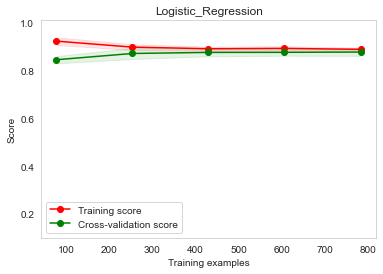

In [41]:
# Logistic Regression
lr = LogisticRegression()
apply_classification('Logistic_Regression', lr, x_train, x_test, y_train, y_test)


Best Parameters for Decision Tree:  DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=15)
Best Score for Decision Tree:  0.8990190582959642
------------------------------------------
Mean Accuracy of Cross Validation: % 88.83
Std of Accuracy of Cross Validation: % 2
------------------------------------------
Accuracy of Decision_Tree : 85.625
Confusion matrix of Decision_Tree :
 [[398  15]
 [ 54  13]]


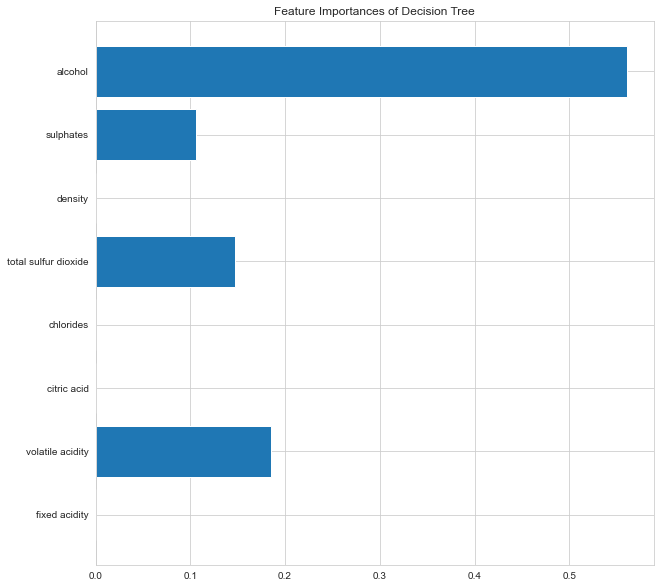

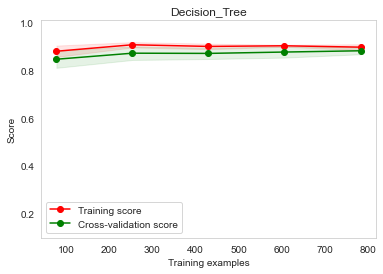

In [42]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
dt_clf = apply_classification('Decision_Tree', clf, x_train, x_test, y_train, y_test)

In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100)
apply_classification('Random_Forest', rf, x_train, x_test, y_train, y_test)

# <font color="darkgreen">Model Takeaways</font>
- Random Forest was the best performing on all my models with an accuracy of almost 87%
    - Logistic Regression gave me an accuracy of : 86.25
    - Decision tree gave me an accuracy of : 85.6
- Predicted that alcohol is the most important feature.
- Need more time to add to my modeling phase.
- The visualizations given by these new techniques helps me greatly in determining how to move forwardf with my conlusions.


# <font color="darkred">Conclusion</font>
- For this individual project, I aimed to analyze which psychochemical are more related with higher quality wine.
- Although I ran out of time and was unable to see how my model performs on unseen data, I am confident that the Random Forest model would be sufficient in correctly in predicting on test data.

- I was able to utilize new methods in order to explore my data as well as model it. If I had more time, I would evaluate my best models performance on unseen data, as well as enhance my exploratory phase. This project would also benefit from access to more features in the data such as  other wine types ,grapes, prices, etc, that I did not have access to in this particular data set.

### <font color="darkblue">Reccomendations based on my findings :</font>
- Alcohol is the most important feature to decide quality of the wine. It appears that that the higher the alcohol percentage, the higher the quality of wine. 

- Sulphates were also a good citeria in searching for good wine. The higher the percentage of sulphates, the higher the quality of wine. 

- I would reccomend choosing wines with lower volitile acidity, sulfur dioxide, and chlorides as the higher those levels were, the more likely the quality of the wine will decrease.

- With more time I hope to expand on my exploration and be able to offer more reccomendations based on those findings. I thank you for taking the time to analyze my research.




